# XY Bending Modes from FEA

In [50]:
import numpy as np
import pandas as pd
import scipy.io
import os

import matplotlib.pyplot as plt

plt.jet()

%matplotlib inline

In [2]:
dataFolder = '/Users/bxin/Library/CloudStorage/OneDrive-SharedLibraries-GMTOCorp/M1S Portal - Documents'

#read SA data
dfSA = pd.read_excel(dataFolder+'/2.4 Utilities/03. Utilities Distribution/utility_mapping_M1B_labels-16-Feb-2023.xlsx')
sax = np.array(dfSA['x_m']) #in M1B
say = np.array(dfSA['y_m'])
saz = np.array(dfSA['z_m'])
saID = np.array(dfSA['LSNo'])
saReqMaxFx_N = np.array(dfSA['ReqMaxFx_N']) #max Fx the SA is allowed to produce??
print('N actuators = ', len(dfSA))

#read Afx (Fx influence matrix)
df = pd.read_csv(dataFolder+'/influnce_matrix_files/OA_influence_matrices_all/Afx-27-Jul-2023.csv', header=None)
Afx = np.array(df)
print('Afx = ', Afx.shape)

#read Afy (Fy influence matrix)
df = pd.read_csv(dataFolder+'/influnce_matrix_files/OA_influence_matrices_all/Afy-27-Jul-2023.csv', header=None)
Afy = np.array(df)
print('Afy = ', Afy.shape)

#read Fx Bending Modes & forces
df = pd.read_csv(dataFolder+'/influnce_matrix_files/OA_influence_matrices_all/Ux-27-Jul-2023.csv', header=None)
UxMat = np.array(df)
print('Ux matrix', UxMat.shape)
df = pd.read_csv(dataFolder+'/influnce_matrix_files/OA_influence_matrices_all/Vx-27-Jul-2023.csv', header=None)
VxMat = np.array(df)
print('Vx matrix', VxMat.shape)
df = pd.read_csv(dataFolder+'/influnce_matrix_files/OA_influence_matrices_all/Sx-27-Jul-2023.csv', header=None)
SxMat = np.array(df)
print('Sx matrix', SxMat.shape)

#read Fy Bending Modes & forces
df = pd.read_csv(dataFolder+'/influnce_matrix_files/OA_influence_matrices_all/Uy-27-Jul-2023.csv', header=None)
UyMat = np.array(df)
print('Uy matrix', UyMat.shape)
df = pd.read_csv(dataFolder+'/influnce_matrix_files/OA_influence_matrices_all/Vy-27-Jul-2023.csv', header=None)
VyMat = np.array(df)
print('Vy matrix', VyMat.shape)
df = pd.read_csv(dataFolder+'/influnce_matrix_files/OA_influence_matrices_all/Sy-27-Jul-2023.csv', header=None)
SyMat = np.array(df)
print('Sy matrix', SyMat.shape)

#read FEA nodes data
mat = scipy.io.loadmat(dataFolder+'/influnce_matrix_files/NodeXYZsurface_meters.mat')
nodeID = mat['NodeXYZsurface_meters'][:,0]
nodex = mat['NodeXYZsurface_meters'][:,2] #swap x/y to get to M1B
nodey = mat['NodeXYZsurface_meters'][:,1]
nodez = mat['NodeXYZsurface_meters'][:,3]
print('N node = ', len(nodeID))

N actuators =  170
Afx =  (27685, 170)
Afy =  (27685, 170)
Ux matrix (27685, 170)
Vx matrix (170, 170)
Sx matrix (170, 170)
Uy matrix (27685, 170)
Vy matrix (170, 170)
Sy matrix (170, 170)
N node =  27685


In [3]:
idx_triple = saz<0.03
Afx_triple = Afx[:, idx_triple]
Afy_triple = Afy[:, idx_triple]

### check the index does give me triple SAs only.

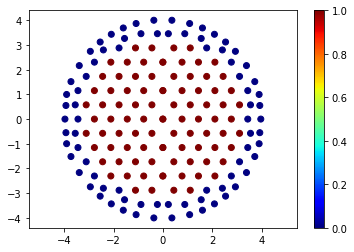

In [4]:
plt.scatter(sax, say, c=idx_triple)
plt.axis('equal')
plt.colorbar();

#### check I can reproduce the all-SA x bending modes from Trupti. Yes.

In [5]:
#svd take ~2 minutes
U, S, Vh = np.linalg.svd(Afx)
V = np.transpose(Vh)

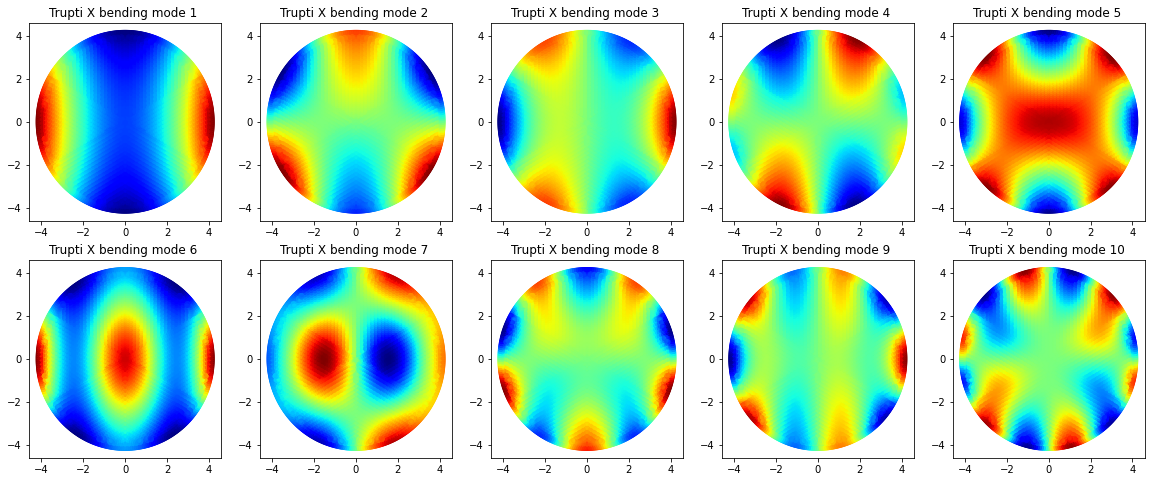

In [6]:
nrow = 2
fig, ax = plt.subplots(nrow,5,figsize=(20,4*nrow))
i = 0
for modeID in range(1,5*nrow+1):
    irow = np.int8(i/5)
    icol = np.mod(i,5)
    i += 1

    img = ax[irow][icol].scatter(nodex, nodey,10, UxMat[:,modeID-1])
    ax[irow][icol].set_title('Trupti X bending mode %d '%modeID)

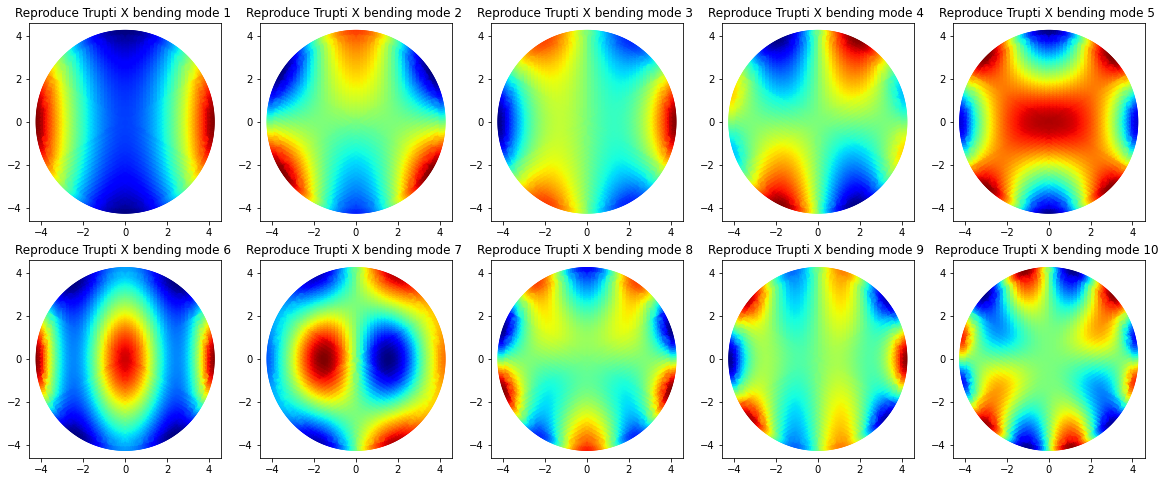

In [7]:
nrow = 2
fig, ax = plt.subplots(nrow,5,figsize=(20,4*nrow))
i = 0
for modeID in range(1,5*nrow+1):
    irow = np.int8(i/5)
    icol = np.mod(i,5)
    i += 1

    img = ax[irow][icol].scatter(nodex, nodey,10, U[:,modeID-1])
    ax[irow][icol].set_title('Reproduce Trupti X bending mode %d '%modeID)

## SVD of influence matrix with Triple Actuators only

In [60]:
filename = 'XYBendingModes_GMT.npy'
if not os.path.exists(filename):
    #each SVD takes ~2 minutes
    Ux90, Sx90, Vhx90 = np.linalg.svd(Afx_triple)
    Vx90 = np.transpose(Vhx90)
    print(Vx90.shape)
    Uy90, Sy90, Vhy90 = np.linalg.svd(Afy_triple)
    Vy90 = np.transpose(Vhy90)
    print(Vy90.shape)
    Ux90 = Ux90[:,:len(Sx90)]
    Uy90 = Uy90[:,:len(Sy90)]
    with open(filename, 'wb') as f:
        np.save(f, Ux90)
        np.save(f, Sx90)
        np.save(f, Vx90)
        np.save(f, Uy90)
        np.save(f, Sy90)
        np.save(f, Vy90)
else:
    with open(filename, 'rb') as f:
        Ux90 = np.load(f)
        Sx90 = np.load(f)
        Vx90 = np.load(f)
        Uy90 = np.load(f)
        Sy90 = np.load(f)
        Vy90 = np.load(f)

(90, 90)
(90, 90)


In [61]:
############normalize bending modes to RMS = 1um ###################
Ux90 *= np.sqrt(Ux90.shape[0])
for modeID in range(1, Ux90.shape[1]+1):
    Vx90[:, modeID-1] *= 1e-6/Sx90[modeID-1]*np.sqrt(Ux90.shape[0]) #1e-6 due to meter to micron conversion
Uy90 *= np.sqrt(Uy90.shape[0])
for modeID in range(1, Uy90.shape[1]+1):
    Vy90[:, modeID-1] *= 1e-6/Sy90[modeID-1]*np.sqrt(Uy90.shape[0]) #1e-6 due to meter to micron conversion

In [62]:
print(UxMat.shape, Ux90.shape, Uy90.shape)

(27685, 170) (27685, 90) (27685, 90)


In [63]:
Afx_triple.shape

(27685, 90)

(-4.364811, 4.364811, -4.406176, 4.404714)

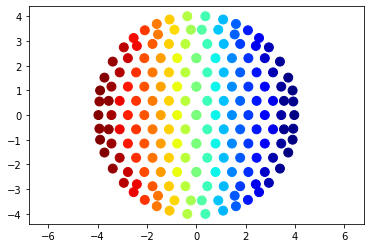

In [64]:
plt.scatter(sax, say, 80, V[:,0])
plt.axis('equal')

(-4.364811, 4.364811, -4.406176, 4.404714)

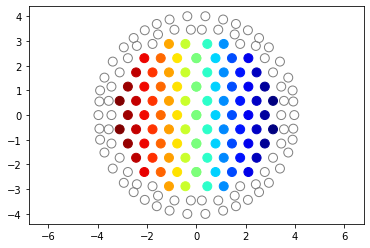

In [65]:
plt.scatter(sax[idx_triple], say[idx_triple], 80, Vx90[:,0])
plt.scatter(sax[~idx_triple], say[~idx_triple], 80, edgecolors='grey', facecolors='none')
plt.axis('equal')

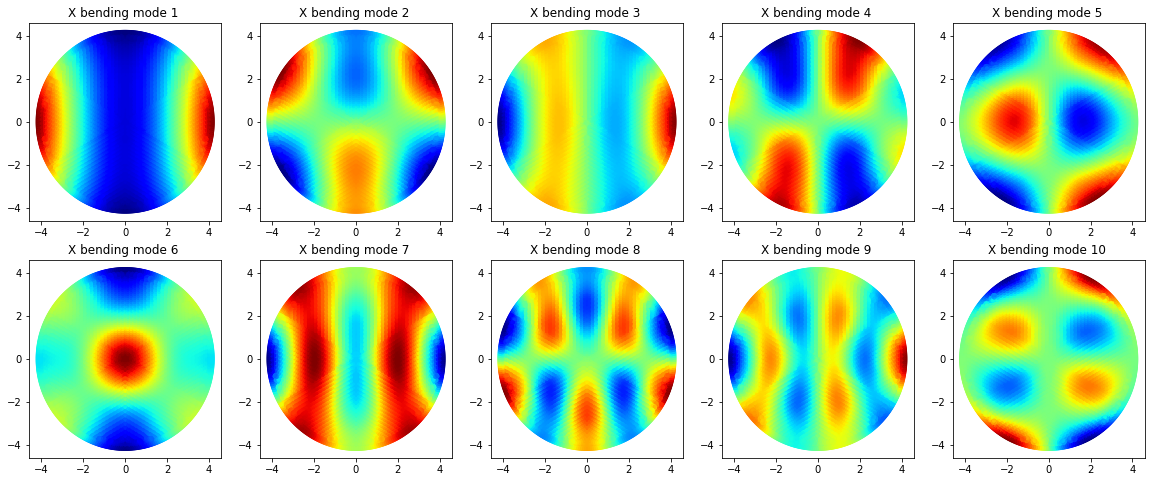

In [68]:
nrow = 2
fig, ax = plt.subplots(nrow,5,figsize=(20,4*nrow))
i = 0
for modeID in range(1,5*nrow+1):
    irow = np.int8(i/5)
    icol = np.mod(i,5)
    i += 1

    img = ax[irow][icol].scatter(nodex, nodey,10, Ux90[:,modeID-1])
    ax[irow][icol].set_title('X bending mode %d '%modeID)

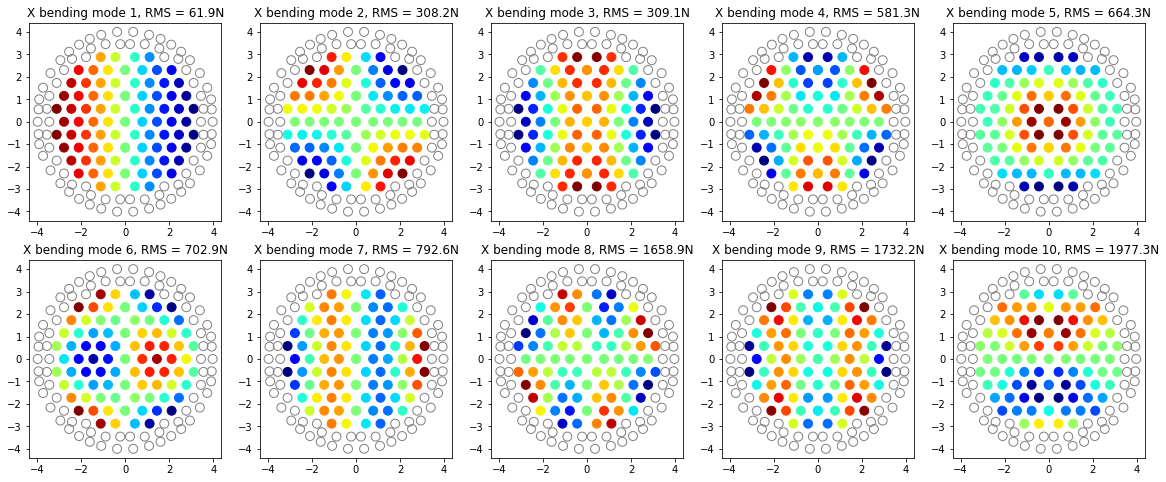

In [69]:
nrow = 2
fig, ax = plt.subplots(nrow,5,figsize=(20,4*nrow))
i = 0
for modeID in range(1,5*nrow+1):
    irow = np.int8(i/5)
    icol = np.mod(i,5)
    i += 1

    img = ax[irow][icol].scatter(sax[idx_triple], say[idx_triple],80, Vx90[:,modeID-1])
    ax[irow][icol].set_title('X bending mode %d, RMS = %.1fN'%(modeID, np.std(Vx90[:,modeID-1])))
    ax[irow][icol].scatter(sax[~idx_triple], say[~idx_triple], 80, edgecolors='grey', facecolors='none')

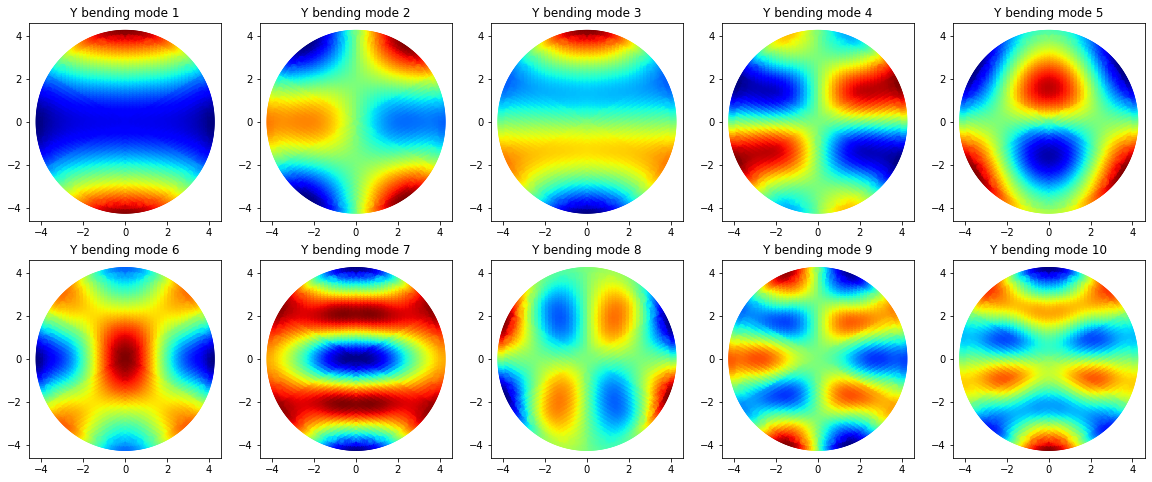

In [70]:
nrow = 2
fig, ax = plt.subplots(nrow,5,figsize=(20,4*nrow))
i = 0
for modeID in range(1,5*nrow+1):
    irow = np.int8(i/5)
    icol = np.mod(i,5)
    i += 1

    img = ax[irow][icol].scatter(nodex, nodey,10, Uy90[:,modeID-1])
    ax[irow][icol].set_title('Y bending mode %d'%modeID)

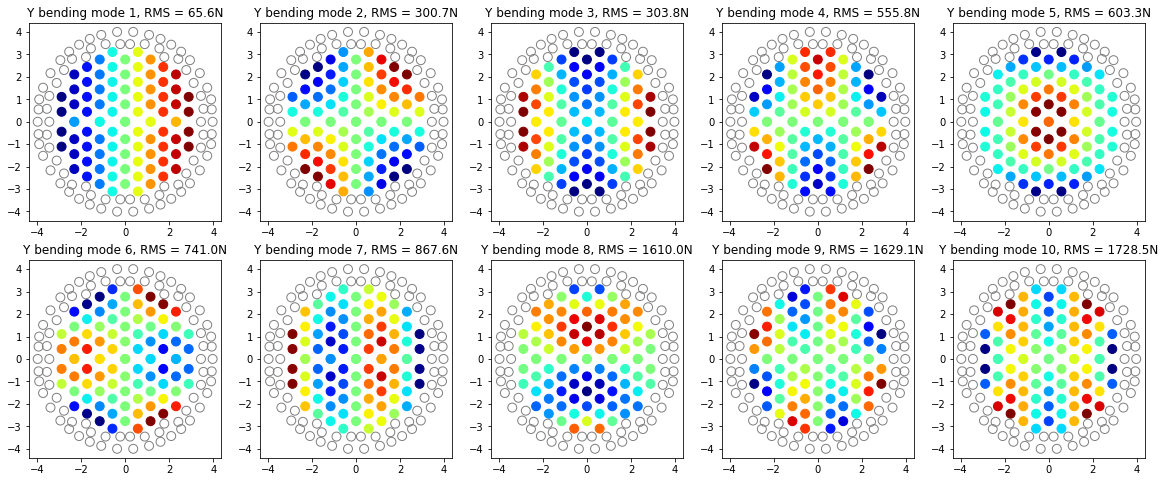

In [72]:
nrow = 2
fig, ax = plt.subplots(nrow,5,figsize=(20,4*nrow))
i = 0
for modeID in range(1,5*nrow+1):
    irow = np.int8(i/5)
    icol = np.mod(i,5)
    i += 1

    img = ax[irow][icol].scatter(say[idx_triple], sax[idx_triple],80, Vy90[:,modeID-1])
    ax[irow][icol].set_title('Y bending mode %d, RMS = %.1fN'%(modeID, np.std(Vy90[:,modeID-1])))
    ax[irow][icol].scatter(sax[~idx_triple], say[~idx_triple], 80, edgecolors='grey', facecolors='none')